In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Downloads/Drinking_water.csv')
df

/var/folders/1b/k9jr1c9576n77p09jjgpyf980000gn/T/ipykernel_14116/410655265.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Downloads/Drinking_water.csv')


,Sample Number,Sample Date,Sample Time,Sample Site,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,202120243,07/01/2021,10:31,23650,Compliance,0.22,0.84,NaN,<1,<1
1,202120244,07/01/2021,09:54,29550,Compliance,0.69,0.81,NaN,<1,<1
2,202120245,07/01/2021,07:52,50200,Operational,0.55,0.77,NaN,<1,<1
3,202120246,07/01/2021,08:12,50250,Compliance,0.87,0.81,NaN,<1,<1
4,202120247,07/01/2021,08:31,50300,Operational,0.80,0.84,NaN,<1,<1
...,...,...,...,...,...,...,...,...,...,...
136430,202329514,11/13/2023,1899-12-31T09:27:00.000,37950,Compliance,NaN,NaN,NaN,NaN,NaN
136431,202329520,11/13/2023,1899-12-31T09:54:00.000,38250,Compliance,NaN,NaN,NaN,NaN,NaN
136432,202329515,11/13/2023,1899-12-31T08:35:00.000,39650,Compliance,NaN,NaN,NaN,NaN,NaN
136433,202329559,11/13/2023,1899-12-31T08:55:00.000,3SC26,Operational,0.84,0.76,NaN,<1,<1


In [3]:
# Удаляю лишние строки
new_df = df.drop(['Sample Number', 'Sample Date', 'Sample Time', 'Sample Site'], axis=1)

In [4]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136435 entries, 0 to 136434
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Sample class                         136435 non-null  object 
 1   Residual Free Chlorine (mg/L)        136405 non-null  float64
 2   Turbidity (NTU)                      136403 non-null  object 
 3   Fluoride (mg/L)                      17972 non-null   object 
 4   Coliform (Quanti-Tray) (MPN /100mL)  136340 non-null  object 
 5   E.coli(Quanti-Tray) (MPN/100mL)      136340 non-null  object 
dtypes: float64(1), object(5)
memory usage: 6.2+ MB


In [5]:
# Функция для удаления знаков '<>'
def clean_column_values(value):
    if isinstance(value, str):
        value = value.replace('<', '').replace('>', '')
    return float(value) if value else None

# Удаляю знаки '<>'
columns_to_clean = ['Turbidity (NTU)', 'Fluoride (mg/L)', 'Coliform (Quanti-Tray) (MPN /100mL)', 'E.coli(Quanti-Tray) (MPN/100mL)']
new_df[columns_to_clean] = new_df[columns_to_clean].applymap(clean_column_values)

/var/folders/1b/k9jr1c9576n77p09jjgpyf980000gn/T/ipykernel_14116/259687332.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[columns_to_clean] = new_df[columns_to_clean].applymap(clean_column_values)


In [6]:
new_df['Sample class'].describe()

count         136435
unique             5
top       Compliance
freq           84897
Name: Sample class, dtype: object

In [7]:
new_df.describe()

,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
count,136405.000000,136403.000000,17972.000000,136340.000000,136340.000000
mean,0.565828,0.724905,0.708604,1.128623,0.999934
std,0.215760,0.260259,0.057052,4.526426,0.027218
min,-9.990000,0.100000,0.030000,-9.000000,-9.000000
25%,0.430000,0.620000,0.690000,1.000000,1.000000
50%,0.580000,0.730000,0.710000,1.000000,1.000000
75%,0.710000,0.840000,0.730000,1.000000,1.000000
max,2.200000,33.800000,0.890000,200.500000,2.000000


**Большой разброс данных в предпоследнем столбце**

In [8]:
# Если решаем, что это выбросы, то можно их удалить
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(new_df, 'Coliform (Quanti-Tray) (MPN /100mL)', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 379
Результирующее число записей: 135960


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
values = {
    'Residual Free Chlorine (mg/L)': new_df['Residual Free Chlorine (mg/L)'].median(),
    'Turbidity (NTU)': new_df['Turbidity (NTU)'].median(),
    'Fluoride (mg/L)': new_df['Fluoride (mg/L)'].median(),
    'Coliform (Quanti-Tray) (MPN /100mL)': new_df['Coliform (Quanti-Tray) (MPN /100mL)'].median(),
    'E.coli(Quanti-Tray) (MPN/100mL)': new_df['E.coli(Quanti-Tray) (MPN/100mL)'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
new_df = new_df.fillna(values)
#выводим результирующую долю пропусков
new_df.isnull().mean()

Sample class                           0.0
Residual Free Chlorine (mg/L)          0.0
Turbidity (NTU)                        0.0
Fluoride (mg/L)                        0.0
Coliform (Quanti-Tray) (MPN /100mL)    0.0
E.coli(Quanti-Tray) (MPN/100mL)        0.0
dtype: float64

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136435 entries, 0 to 136434
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Sample class                         136435 non-null  object 
 1   Residual Free Chlorine (mg/L)        136435 non-null  float64
 2   Turbidity (NTU)                      136435 non-null  float64
 3   Fluoride (mg/L)                      136435 non-null  float64
 4   Coliform (Quanti-Tray) (MPN /100mL)  136435 non-null  float64
 5   E.coli(Quanti-Tray) (MPN/100mL)      136435 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.2+ MB


**Все пропуски заполнены и значения приведены к float**

## XGBoost

In [11]:
# импорт необходимых библиотек
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [12]:
new_df.head()

,Sample class,Residual Free Chlorine (mg/L),Turbidity (NTU),Fluoride (mg/L),Coliform (Quanti-Tray) (MPN /100mL),E.coli(Quanti-Tray) (MPN/100mL)
0,Compliance,0.22,0.84,0.71,1.0,1.0
1,Compliance,0.69,0.81,0.71,1.0,1.0
2,Operational,0.55,0.77,0.71,1.0,1.0
3,Compliance,0.87,0.81,0.71,1.0,1.0
4,Operational,0.80,0.84,0.71,1.0,1.0


In [13]:
X = new_df.drop(['Sample class'], axis=1)
y = new_df['Sample class']
# Целевая переменная для модели XGBoost должна быть представлена целым числом.
y = new_df['Sample class'].apply(lambda x: 0 if x == "Compliance" else 
                                           1 if x == "Operational" else 
                                           2 if x == "Resample_Compliance" else 
                                           3 if x == "Resample_Operational" else 
                                           4 if x == "Op-resample" else 
                                           5)

In [14]:
# train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Инициализация экзмепляра класса XGBClassifier
xgb_classifier = xgb.XGBClassifier()

In [16]:
# Определение сетки параметров для перебора.
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [30, 50, 100]
}

In [17]:
# Инициализация экзмепляра класса GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier,  param_grid=parameters,  scoring='accuracy', cv=5)

In [18]:
# Обучение модели с перебором параметров
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [30, 50, 100]},
             scoring='accuracy')

In [19]:
# Лучшие параметры и точность модели
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Лучшие параметры:", best_params)
print("Точность на обучающем наборе:", best_score)

# Оценка модели на тестовом наборе
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность на тестовом наборе:", accuracy)

Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 30}
Точность на обучающем наборе: 0.7445303873293074
Точность на тестовом наборе: 0.7472056290541284


**Важность признаков (Feature Importance)**

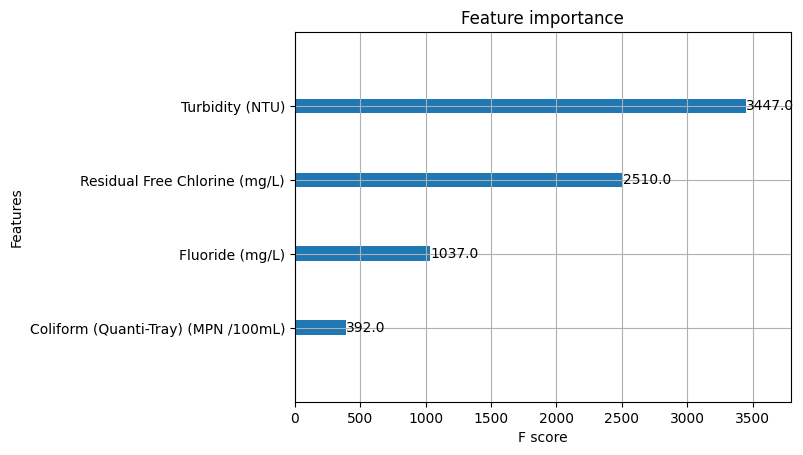

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

best_xg_model = grid_search.best_estimator_

# Теперь у нас есть модель для визуализации важности признаков
plot_importance(best_xg_model)
plt.show()

**Визуализация дерева решений**

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

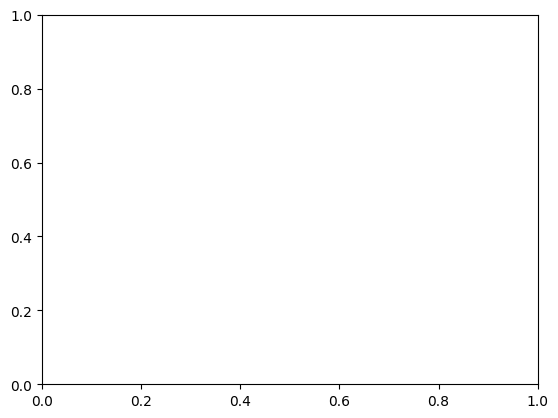

In [21]:
from xgboost import plot_tree

# Предположим, что 'model' - это ваша обученная модель XGBoost
# Вы можете выбрать номер дерева (ntree) который хотите отобразить
plot_tree(best_xg_model, num_trees=0)
plt.show()

**Результаты прогнозирования (ROC-кривая для классификации)**

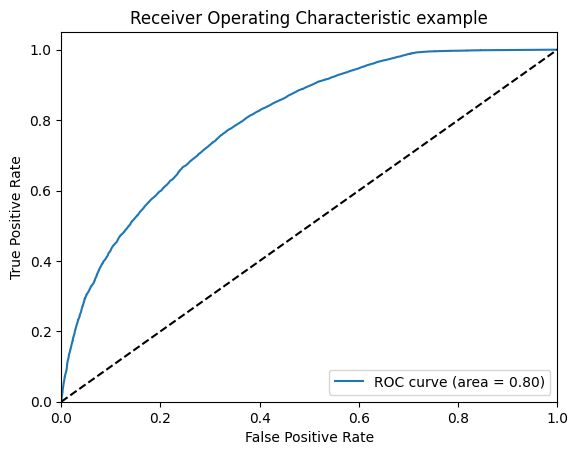

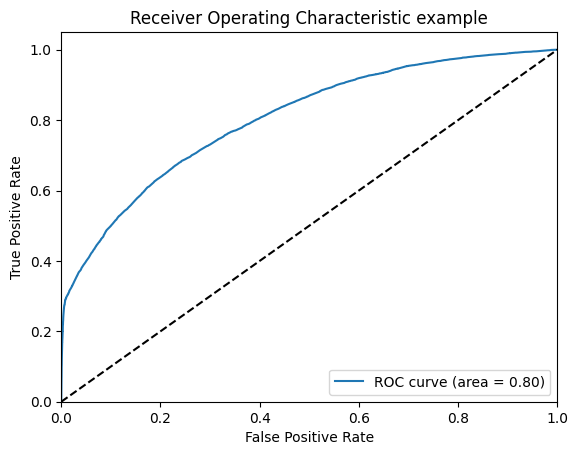

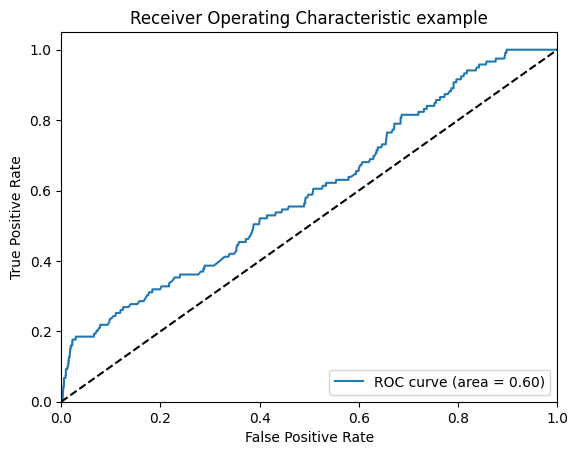

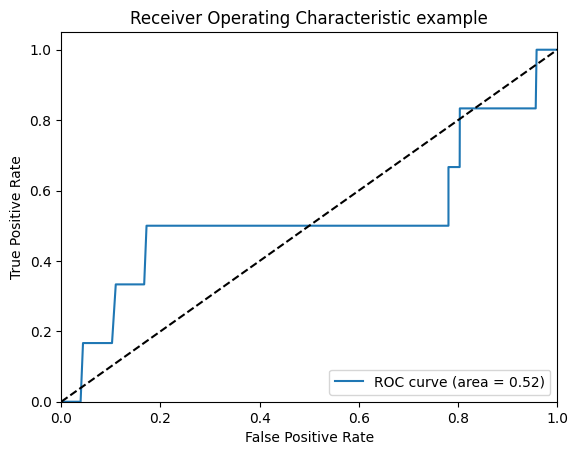

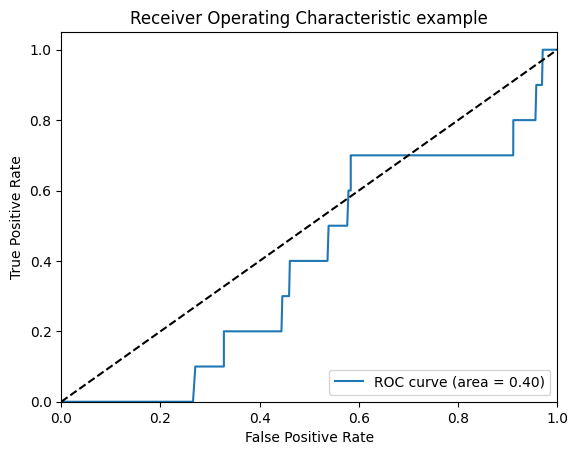

In [22]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output (one-hot encode)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Assuming y_pred are probabilities which is typical for roc_curve
# If y_pred are not probabilities, you will need to convert them to probabilities
y_pred_prob = best_xg_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Catboost

In [23]:
# Импортируем необходимые библиотеки
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hyperopt import hp, fmin, tpe, Trials

X = new_df.drop(['Sample class'], axis=1)
y = new_df['Sample class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
dict_of_params = {
    'iterations': [30, 50, 70],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.3],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

In [25]:
# Переводим словарь dict_of_params в формат Hyperopt
space = {
    'iterations': hp.choice('iterations', dict_of_params["iterations"]),
    'depth': hp.choice('depth', dict_of_params["depth"]),
    'learning_rate': hp.uniform('learning_rate', dict_of_params["learning_rate"][0], dict_of_params["learning_rate"][1]),
    'l2_leaf_reg': hp.choice('l2_leaf_reg', dict_of_params["l2_leaf_reg"])
}

In [26]:
# Определяем функцию для оптимизации с гиперпараметрами
def objective(params):
    model = cb.CatBoostClassifier(**params)
    model.fit(X_train, y_train, silent=True)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score

In [27]:
# Запускаем оптимизацию с помощью Hyperopt
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

100%|███████| 100/100 [01:11<00:00,  1.41trial/s, best loss: 0.7368343900025653]


In [32]:
# Получаем лучшие значения гиперпараметров
final_best_params = {}
for key in best:
    try:
        final_best_params[key] = dict_of_params[key][best[key]]
    except:
        final_best_params[key] = best[key]


# Обучаем модель с лучшими гиперпараметрами
# Создание экземпляра CatBoostClassifier
model = cb.CatBoostClassifier(**final_best_params)
model.fit(X_train, y_train, silent=True)


# Предсказываем классы для тестовых данных
y_pred = model.predict(X_test)

# Вычисляем точность модели
accuracy = accuracy_score(y_test, y_pred)

# Выводим результаты
print("Точность модели:", accuracy)

Точность модели: 0.7368343900025653


**Важность признаков (Feature Importance)**

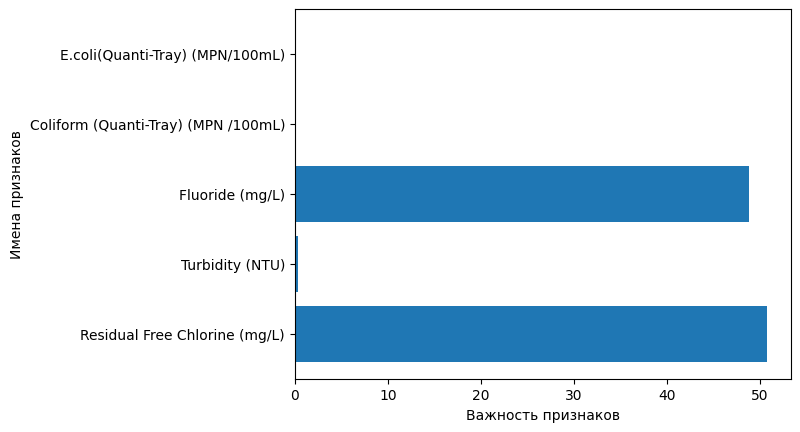

In [33]:
feature_importance = model.get_feature_importance()
feature_names = model.feature_names_

plt.barh(feature_names, feature_importance)
plt.xlabel('Важность признаков')
plt.ylabel('Имена признаков')
plt.show()

In [36]:
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/catboost/core.py:1467: UserWarning: To draw plots in fit() method you should install ipywidgets and ipython
  warnings.warn("To draw plots in fit() method you should install ipywidgets and ipython")


ImportError: No module named 'ipywidgets'

In [37]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.show()

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/__init__.py)